In [156]:
#importing

import sys
import os
print("Current working directory: ", os.getcwd())
import matplotlib.pyplot as plt
import numpy as np    
import pandas as pd
#!{sys.executable} -m pip install sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl


Current working directory:  /home/hp/Documents/IML/IML_2022/A2


In [37]:
#load in data: A2_data.csv
data = pd.read_csv('A2_data.csv')
print("The shape of the data is", data.shape)

The shape of the data is (100000, 12)


In [38]:
#Print data properties
print("These are the variables:",data.columns)
print("The data points have one of three labels:", np.unique(data['class']))
print("The amount of galaxies is",np.count_nonzero([np.where(data['class']=="GALAXY")]))
print("The amount of QSOs is",np.count_nonzero([np.where(data['class']=="QSO")]))
print("The amount of stars is",np.count_nonzero([np.where(data['class']=="STAR")]))

These are the variables: Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'field_ID', 'MJD',
       'redshift', 'plate', 'class'],
      dtype='object')
The data points have one of three labels: ['GALAXY' 'QSO' 'STAR']
The amount of galaxies is 59444
The amount of QSOs is 18961
The amount of stars is 21594


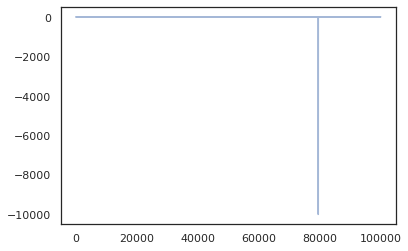

In [39]:
#finding outliers
plt.plot(data['u'], alpha = 0.5)
plt.show()


In [195]:
#when selecting data...
#print("The index of the outlier is",np.where(data['z']<0))
datagood = data.loc[np.where(data['z']>0)]
#plt.plot(datagood['u'], alpha = 0.5)

datashort = datagood[['alpha', 'delta','u','g','r','i','z','MJD',"redshift", 'class']]



In [196]:
datashort

,alpha,delta,u,g,r,i,z,MJD,redshift,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,56064,-0.001584,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,53727,-0.824700,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,54883,-0.418000,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,51783,5.953000,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,56069,0.846000,GALAXY
...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,55590,1.046000,GALAXY
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,53531,5.290000,GALAXY
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,58162,-4.145000,GALAXY
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,52376,7.152000,GALAXY


# Visualization 

['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'field_ID', 'MJD', 'redshift', 'plate', 'class']


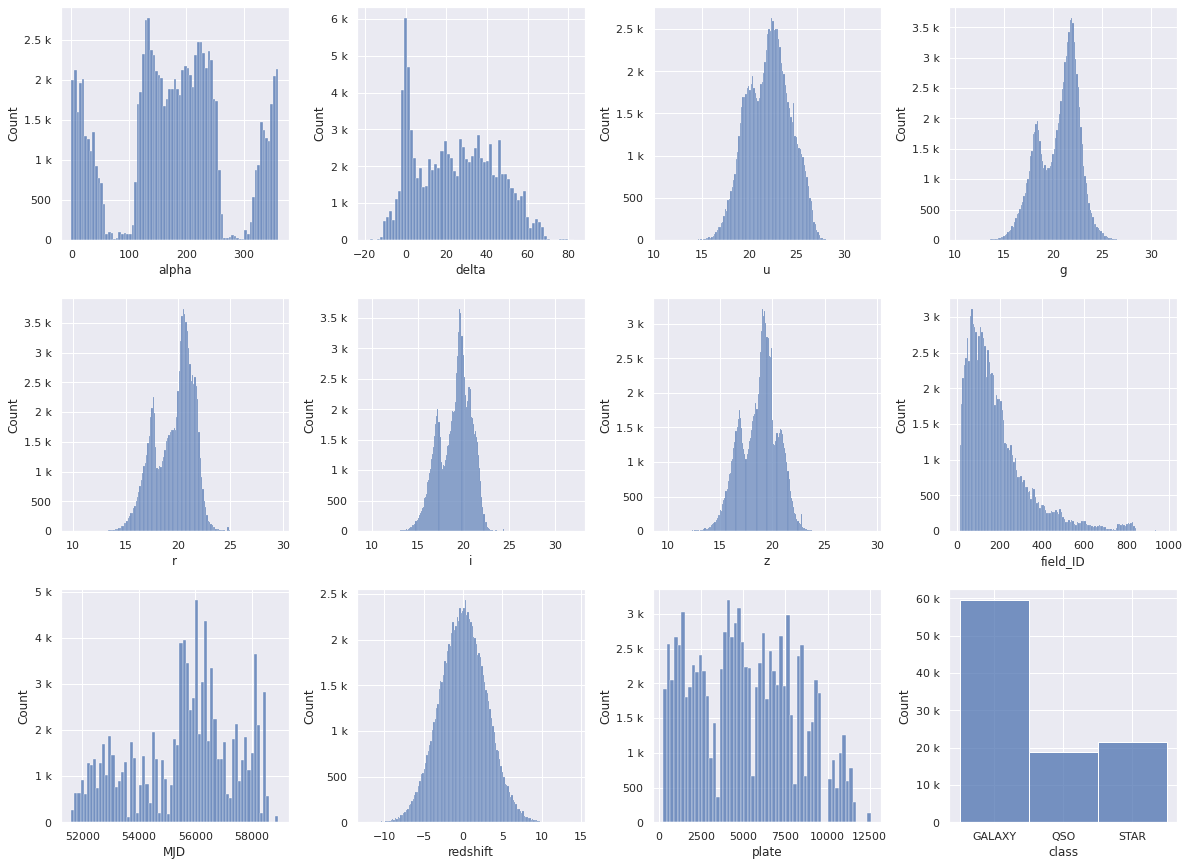

In [157]:
sns.set(font_scale=1)
fig, ax = plt.subplots(3,4, figsize = (20, 15))
ax = np.array(ax).flatten()
feature = list(datagood.columns)
print(feature)
for i, ax in enumerate(ax):
    sns.histplot(data=datagood, x=feature[i], ax = ax)
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.subplots_adjust(wspace=.3, hspace=.25)
plt.savefig("hist_all_features.pdf")

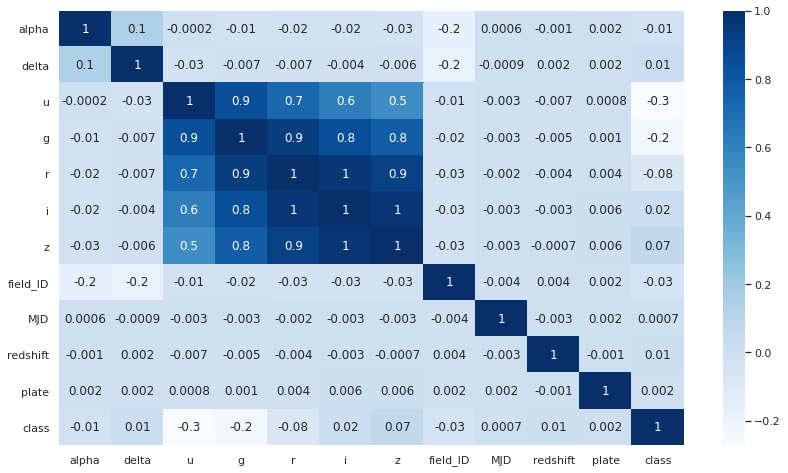

In [174]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
data_corr = datagood.copy()
data_corr['class'] = data_corr['class'].map({"GALAXY":1, "QSO":2, "STAR":3}) 
corr = data_corr.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')
plt.savefig("heatmap_corr.pdf")

In [186]:
# use integers to represent the class labels

data_used = datashort.copy()
data_used['class'] = data_used['class'].map({"GALAXY":1, "QSO":2, "STAR":3}) 
data_used

,alpha,delta,u,g,r,i,z,MJD,redshift,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,56064,-0.001584,1
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,53727,-0.824700,1
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,54883,-0.418000,1
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,51783,5.953000,1
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,56069,0.846000,1
...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,55590,1.046000,1
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,53531,5.290000,1
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,58162,-4.145000,1
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,52376,7.152000,1


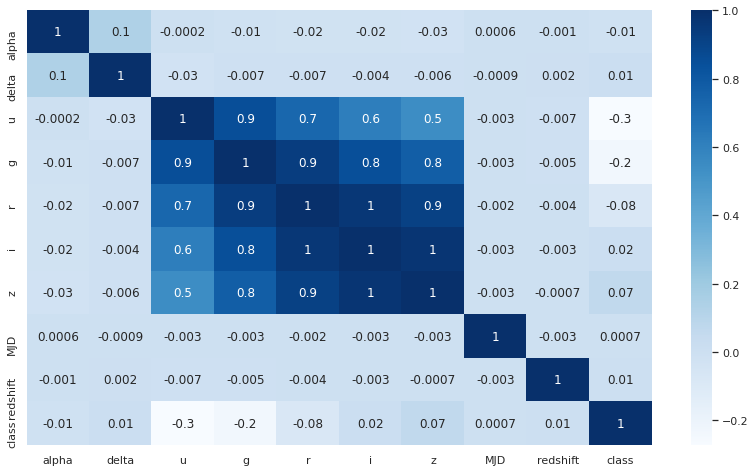

In [172]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr_2 = data_used.corr()
heatmap = sns.heatmap(corr_2, annot=True, cmap="Blues", fmt='.1g')
plt.savefig("heatmap_corr.pdf")

# T-SNE reduction
use T-SNE to reduce the data into 2 dimensions

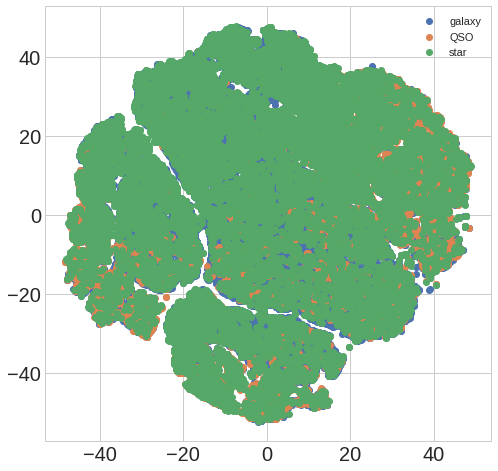

In [202]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.manifold import TSNE

# reduced dimenesion
n_comp = 2
# numpy array without the class labels
data_feature = data_used.drop("class", axis = 1).to_numpy()
data_feature_hc = data_high_corr.to_numpy()
# class labels using strings
data_label = datagood["class"].to_numpy()
# class labels using integers
data_label_num = data_used["class"].to_numpy()

# #X2 = StandardScaler().fit_transform(data_feature)
X2 = preprocessing.scale(data_feature)

# pca = PCA(n_components=n_comp)
# red_com_pca = pca.fit(X2).transform(X2)
# #fit = pca.fit(data_feature)
# #red_com = fit.transform(data_feature)

#Use t-sne for data reduction
red_com = TSNE(n_components=2).fit_transform(X2)

# visualize the reduced data.
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(red_com[data_label == "GALAXY"][:,0], red_com[data_label == "GALAXY"][:,1], label = "galaxy")
ax.scatter(red_com[data_label == "QSO"][:,0], red_com[data_label == "QSO"][:,1], label = "QSO")
ax.scatter(red_com[data_label == "STAR"][:,0], red_com[data_label == "STAR"][:,1], label = "star")
plt.legend()

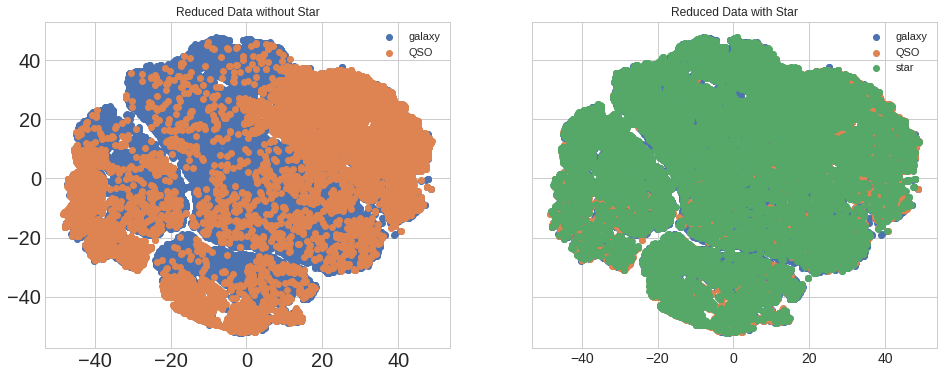

In [203]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(1,2,figsize = (16,6), sharey = True, sharex = True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


ax[0].scatter(red_com[data_label == "GALAXY"][:,0], red_com[data_label == "GALAXY"][:,1], label = "galaxy")
ax[0].scatter(red_com[data_label == "QSO"][:,0], red_com[data_label == "QSO"][:,1], label = "QSO")
ax[0].set_title("Reduced Data without Star")
ax[0].legend()

ax[1].scatter(red_com[data_label == "GALAXY"][:,0], red_com[data_label == "GALAXY"][:,1], label = "galaxy")
ax[1].scatter(red_com[data_label == "QSO"][:,0], red_com[data_label == "QSO"][:,1], label = "QSO")
ax[1].scatter(red_com[data_label == "STAR"][:,0], red_com[data_label == "STAR"][:,1], label = "star")
ax[1].set_title("Reduced Data with Star")
ax[1].legend()

plt.savefig("reduced_data.pdf")


# Random Forest
tuning the parameter max_depth of the random forest classifier

1
KFold(n_splits=5, random_state=None, shuffle=True)
accuracy 0.66295
accuracy 0.6518
accuracy 0.6639
accuracy 0.6533
accuracy 0.6587329366468323
Average score: 0.6581365873293664
2
KFold(n_splits=5, random_state=None, shuffle=True)
accuracy 0.68075
accuracy 0.68585
accuracy 0.68175
accuracy 0.68305
accuracy 0.6846842342117105
Average score: 0.6832168468423422
3
KFold(n_splits=5, random_state=None, shuffle=True)
accuracy 0.7168
accuracy 0.71455
accuracy 0.71525
accuracy 0.71925
accuracy 0.7213860693034652
Average score: 0.717447213860693
4
KFold(n_splits=5, random_state=None, shuffle=True)
accuracy 0.74145
accuracy 0.74195
accuracy 0.7449
accuracy 0.7337
accuracy 0.736436821841092
Average score: 0.7396873643682184
5
KFold(n_splits=5, random_state=None, shuffle=True)
accuracy 0.763
accuracy 0.76005
accuracy 0.766
accuracy 0.76105
accuracy 0.7652882644132206
Average score: 0.7630776528826442
6
KFold(n_splits=5, random_state=None, shuffle=True)
accuracy 0.7938
accuracy 0.78875
accuracy 0.

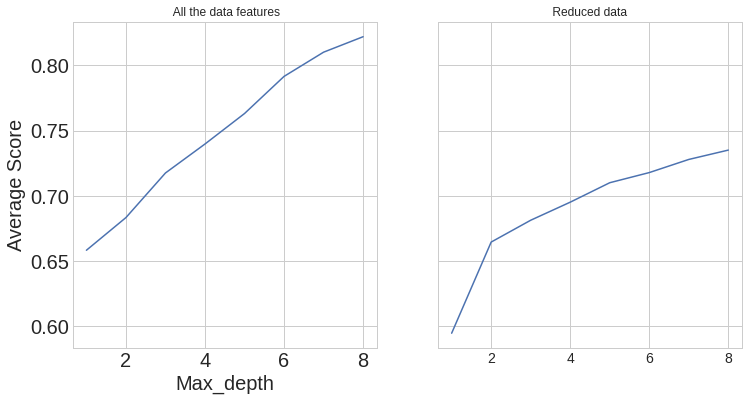

In [201]:
from sklearn.ensemble import RandomForestClassifier
def rf_cv(max_depth, data_range, final_data):
    '''
    max_depth: the max_depth parameters in the random forest classifier
    data_range: the number of data points that are chosen to run the experiment
    final_data: data_feature for the original data, red_com for the reduced data
    '''
    acclist = []
    #Cross-validation (KFold) and shuffle the order of the data points
    kfold = KFold(n_splits = 5, shuffle = True)
    print(kfold)

    
    #train in each loop
    for train_ind, test_ind in kfold.split(final_data):
        train_X = final_data[train_ind]
        train_y = data_label_num[train_ind]
        test_X = final_data[test_ind]
        test_y = data_label_num[test_ind]

    #     kmeans = KMeans(n_clusters=3, random_state=0).fit(train_X)
    #     label = kmeans.predict(train_y)
        clf = RandomForestClassifier(max_depth=max_depth, random_state=0)
        clf.fit(train_X,train_y)
        #accuracy
        acc = np.sum(clf.predict(test_X) == test_y)/len(test_y)
        #print("x",clf.predict(test_X))
        #print("y",test_y)
        print("accuracy {}".format(acc))
        acclist.append(acc)

    print("Average score:", np.mean(acclist))
    return np.mean(acclist)

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(1,2,figsize = (12,6), sharey = True, sharex = True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
depth_list = np.arange(1,9,1)
avgscore_list = []
for i in depth_list:
    print(i)
    avgscore_list.append(rf_cv(i,10000,data_feature))

ax[0].plot(depth_list, avgscore_list)
ax[0].set_xlabel("Max_depth",fontsize = 20)
ax[0].set_ylabel("Average Score",fontsize = 20)
ax[0].set_title(" All the data features")


avgscore_list = []
for i in depth_list:
    avgscore_list.append(rf_cv(i,10000, red_com))

ax[1].plot(depth_list, avgscore_list)
# ax[1].xlabel("Max_depth",fontsize = 20)
# ax[1].ylabel("Average Score",fontsize = 20)
ax[1].set_title(" Reduced data ")

# avgscore_list = []
# for i in depth_list:
#     print(i)
#     avgscore_list.append(rf_cv(i,10000, data_feature_hc))

# ax[1].plot(depth_list, avgscore_list)
# # ax[1].xlabel("Max_depth",fontsize = 20)
# # ax[1].ylabel("Average Score",fontsize = 20)
# ax[1].set_title(" High Correlated ")



plt.savefig("max_depth_score_corr.pdf")
plt.show()


    




# Clustering using Kmean method

In [69]:
#Clustering using K means
#full data

clustering = KMeans(n_clusters=3).fit(data_feature[:20000])
#np.unique(clustering.labels_)
nclusters = len(set(clustering.labels_))
#np.count_nonzero(np.where(clustering.labels_== 0))
print(nclusters)

3


# Clustering first then reduction

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
# 
# origin_label = np.unique()
clf = RandomForestClassifier(max_depth=8, random_state=0)
# split the data into 80% traning data and 20% testing data.
X_train, X_test, y_train, y_test = train_test_split(
     data_feature, data_label_num, test_size=0.2, random_state=42)
# fit the random forest classifier with the training data and training label 

y_pred = clf.fit(X_train,y_train).predict(X_test)
X_test_scale = preprocessing.scale(X_test)

# clustering the testing data using K mean method
clustering = KMeans(n_clusters=3).fit(X_test_scale)

red_com_test = TSNE(n_components=2).fit_transform(X_test_scale)
#plotting the results:

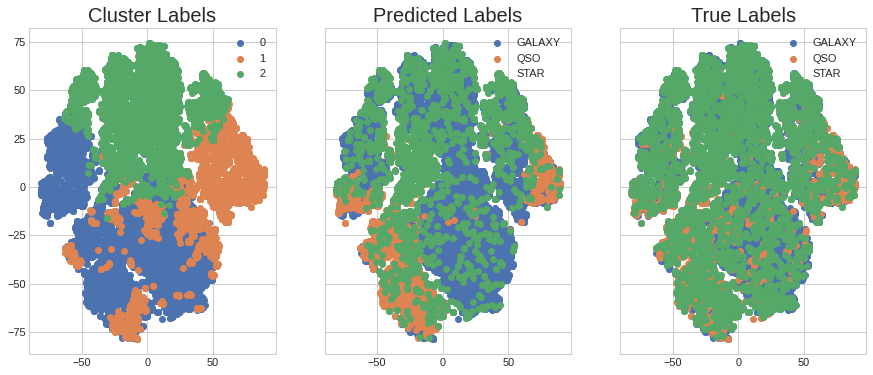

In [182]:
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(1,3,figsize = (15,6), sharey = True, sharex = True)
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20

class_name = ["GALAXY","QSO","STAR"]
u_labels = np.unique(clustering.labels_)
for i in u_labels:
    ax[0].scatter(red_com_test[clustering.labels_ == i , 0] , red_com_test[clustering.labels_ == i , 1] , label = i)
    ax[0].set_title("Cluster Labels", fontsize = 20)
    ax[0].legend()
    
u_labels_pred = np.unique(y_pred)
for j in u_labels_pred:
    ax[1].scatter(red_com_test[y_pred == j , 0] , red_com_test[y_pred == j , 1] , label = class_name[j-1])
    ax[1].set_title("Predicted Labels", fontsize = 20)
    ax[1].legend()
    
u_labels_true = np.unique(y_test)
for k in u_labels_true:
    ax[2].scatter(red_com_test[y_test == k , 0] , red_com_test[y_test == k , 1] , label = class_name[k-1])
    ax[2].set_title("True Labels", fontsize = 20)
    ax[2].legend()

plt.savefig("cluster_reduction.pdf")
plt.show()

# Reduction first then clustering

In [183]:
red_com_test_2 = TSNE(n_components=2).fit_transform(X_test_scale)

# clustering the reduced test data.
clustering_2 = KMeans(n_clusters=3).fit(red_com_test_2)


#plotting the results:

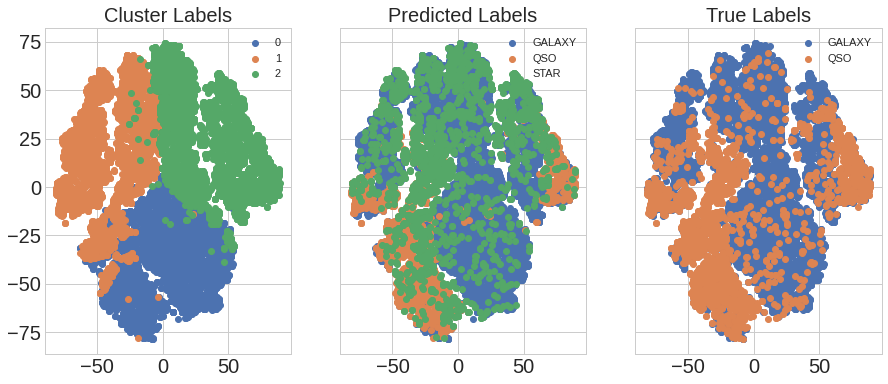

In [185]:
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(1,3,figsize = (15,6), sharey = True, sharex = True)
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20

class_name = ["GALAXY","QSO","STAR"]
u_labels_2 = np.unique(clustering_2.labels_)
for i in u_labels_2:
    ax[0].scatter(red_com_test[clustering_2.labels_ == i , 0] , red_com_test[clustering_2.labels_ == i , 1] , label = i)
    ax[0].set_title("Cluster Labels", fontsize = 20)
    ax[0].legend()
    
u_labels_pred = np.unique(y_pred)
for j in u_labels_pred:
    ax[1].scatter(red_com_test[y_pred == j , 0] , red_com_test[y_pred == j , 1] , label = class_name[j-1])
    ax[1].set_title("Predicted Labels", fontsize = 20)
    ax[1].legend()
    
u_labels_true = np.unique(y_test)
for k in u_labels_true[:-1]:
    ax[2].scatter(red_com_test[y_test == k , 0] , red_com_test[y_test == k , 1] , label = class_name[k-1])
    ax[2].set_title("True Labels", fontsize = 20)
    ax[2].legend()

plt.savefig("reduction_cluster.pdf")
plt.show()

# SVMs (support-vector machines) are supervised learning methods used for classification

In [187]:
from sklearn.cluster import KMeans
from sklearn import svm

acclist = []
#Cross-validation (KFold)
kfold = KFold(n_splits = 5)
print(kfold)

#train in each loop, PCA reduced data
for train_ind, test_ind in kfold.split(data_feature): #(data_feature[10000]):
    train_X = red_com[train_ind]
    train_y = data_label_num[train_ind]
    test_X = red_com[test_ind]
    test_y = data_label_num[test_ind]
    
#     kmeans = KMeans(n_clusters=3, random_state=0).fit(train_X)
#     label = kmeans.predict(train_y)
    clf = svm.SVC()
    clf.fit(train_X,train_y)
    #accuracy
    acc = np.sum(clf.predict(test_X) == test_y)/len(test_y)
    #print("x",clf.predict(test_X))
    #print("y",test_y)
    print("accuracy {}".format(acc))
    acclist.append(acc)
    
print("Average score:", np.mean(acclist)) 

KFold(n_splits=5, random_state=None, shuffle=False)
accuracy 0.6992
accuracy 0.7041
accuracy 0.70865
accuracy 0.7188
accuracy 0.712735636781839
Average score: 0.7086971273563678
